In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import itertools
## used for concatenation

In [6]:
from scipy import stats

In [7]:
from numpy import percentile

In [8]:
df=pd.read_csv("Test.csv")

In [9]:
print(df.head())

  Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_22713      F  32.0                5              Single  Springfield   
1    EID_9658      M  65.0                2              Single      Lebanon   
2   EID_22203      M  52.0                3             Married  Springfield   
3    EID_7652      M  50.0                5              Single   Washington   
4    EID_6516      F  44.0                3             Married     Franklin   

        Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0        R&D             Conceptual              7.0                     4   
1         IT              Directive             41.0                     2   
2      Sales              Directive             21.0                     3   
3  Marketing             Analytical             11.0                     4   
4        R&D             Conceptual             12.0                     4   

   ...  Pay_Scale  Compensation_and_Benefits  Work

In [10]:
df.isnull().sum(axis = 0)

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [12]:
df.isnull().sum(axis = 0)

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [14]:
average_age=np.mean(df.Age)
# = 39.797816132441

In [15]:
print(np.max(df.Age))
# = 65

65.0


In [16]:
older_ees=df[df['Age']>=50]
# = 838

In [17]:
younger_ees=df[df['Age']<=49]
# = 2001

In [18]:
older_ees_with_higher_pay=older_ees[older_ees['Pay_Scale']>=7]
# = 377

In [19]:
older_ees_with_higher_pay_pct=377/838
# 0.4498806682577566
# 44% of ees over 50 are at a higher pahy scale (7 or higher)

In [20]:
older_ees_with_higher_pay_pct

0.4498806682577566

In [21]:
younger_ees_with_higher_pay=younger_ees[younger_ees['Pay_Scale']>=7]
# = 824

In [22]:
younger_ees_with_higher_pay_pct=824/2001

In [23]:
younger_ees_with_higher_pay_pct
# = 0.41179410294852575
# 41% of ees under 50 are at a higher pahy scale (7 or higher)

0.41179410294852575

In [24]:
# single_female=gender_female.Relationship_Status==0

In [25]:
import sqlite3

In [26]:
connection = sqlite3.connect("da_project.db")

In [27]:
cursor =connection.cursor()

In [28]:
cursor.execute("select Age from Test")

In [29]:
#ans = cursor.fetchall() 

In [30]:
cursor.execute("select Gender, count (*) from Test")

In [31]:
count=cursor.fetchall()

In [32]:
print(count)

[('Gender', 3001)]


In [33]:
cursor.execute("select sum(Age) from Test")

In [34]:
#sum=cursor.fetchall()

In [35]:
cursor.execute("select min(Age) from Test")

In [36]:
min=cursor.fetchall()
# min =19

In [37]:
cursor.execute("select avg(Education_Level) from Test")

In [38]:
avg_Ed=cursor.fetchall()
# [(3.2252582472509164,)]

In [39]:
for item in cursor.execute('SELECT Relationship_Status FROM Test limit 10'):
    print(item)

# Be sure to close the connection


('Relationship_Status',)
('Single',)
('Single',)
('Married',)
('Single',)
('Married',)
('Married',)
('Married',)
('Married',)
('Single',)


In [40]:
connection.close()

In [41]:
df['Relationship_Status'] =df['Relationship_Status'].replace({'Single': 0, 'Married' :1})

In [42]:
print(df.head())

  Employee_ID Gender   Age  Education_Level  Relationship_Status     Hometown  \
0   EID_22713      F  32.0                5                    0  Springfield   
1    EID_9658      M  65.0                2                    0      Lebanon   
2   EID_22203      M  52.0                3                    1  Springfield   
3    EID_7652      M  50.0                5                    0   Washington   
4    EID_6516      F  44.0                3                    1     Franklin   

        Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0        R&D             Conceptual              7.0                     4   
1         IT              Directive             41.0                     2   
2      Sales              Directive             21.0                     3   
3  Marketing             Analytical             11.0                     4   
4        R&D             Conceptual             12.0                     4   

   ...  Pay_Scale  Compensation_and_Benefits

In [43]:
df.Relationship_Status.value_counts()
# single: 1059
# Married: 1941

1    1941
0    1059
Name: Relationship_Status, dtype: int64

In [44]:
df['Gender'] =df['Gender'].replace({'M': 0, 'F' :1})

In [45]:
df.Gender.value_counts()
# .576% = Female
# .424% = Male

1    1728
0    1272
Name: Gender, dtype: int64

In [46]:
df.Education_Level.value_counts()
# 1 = 284  = 0.09466667%
# 2 = 291  = 0.097%
# 3 = 1185 = 0.395%
# 4 = 942  = 0.314%
# 5 = 298  = 0.09933333%

3    1185
4     942
5     298
2     291
1     284
Name: Education_Level, dtype: int64

In [47]:
df.Pay_Scale.value_counts()
# totals added up to 2997, but I divided each number by 3000 to get the pct
# 8.0     572   =0.19066667%
# 6.0     536   =0.17866667%
# 5.0     480   =0.16%
# 4.0     422   =0.14066667%
# 7.0     352   =0.11733333%
# 9.0     239   =0.07966667%
# 3.0     111   =0.037%
# 2.0     106   =0.03533333%
# 10.0    105   =0.035%
# 1.0      74   =0.0246667%

8.0     572
6.0     536
5.0     480
4.0     422
7.0     352
9.0     239
3.0     111
2.0     106
10.0    105
1.0      74
Name: Pay_Scale, dtype: int64

In [48]:
df.Compensation_and_Benefits.value_counts()
# type2    1741
# type3     964
# type4     137
# type0      93
# type1      65

type2    1741
type3     964
type4     137
type0      93
type1      65
Name: Compensation_and_Benefits, dtype: int64

In [49]:
gender_male=df[df['Gender']==0]
# 1272 Males

In [50]:
gender_female=df[df['Gender']==1]
# 1728 Females

In [51]:
single_female=gender_female.Relationship_Status==0

In [52]:
single_female.value_counts()
#1098 False
#630 True

False    1098
True      630
Name: Relationship_Status, dtype: int64

In [53]:
single_male=gender_male.Relationship_Status==1

In [54]:
single_male.value_counts()
# True 843
# False 429

True     843
False    429
Name: Relationship_Status, dtype: int64

In [55]:
print(max(df.Pay_Scale))

10.0


In [56]:
high_pay=df[df['Pay_Scale']>=7]
#Total of 1268

In [57]:
female_high_pay=gender_female[gender_female['Pay_Scale']>=7]

In [228]:
#female_high_pay.count()
# = 722

In [59]:
female_high_pay_pct=722/1728

In [60]:
female_high_pay_pct
# 42% of all females have pay scale at 7 or higher

0.41782407407407407

In [61]:
male_high_pay=gender_male[gender_male['Pay_Scale']>=7]

In [229]:
#male_high_pay.count()
# = 546

Employee_ID                  546
Gender                       546
Age                          520
Education_Level              546
Relationship_Status          546
Hometown                     546
Unit                         546
Decision_skill_possess       546
Time_of_service              530
Time_since_promotion         546
growth_rate                  546
Travel_Rate                  546
Post_Level                   546
Pay_Scale                    546
Compensation_and_Benefits    546
Work_Life_balance            545
VAR1                         546
VAR2                         506
VAR3                         546
VAR4                         493
VAR5                         546
VAR6                         546
VAR7                         546
dtype: int64

In [231]:
male_high_pay_pct=546/1272
# #43 % of all males have pay scale at 7 or higher

In [232]:
male_high_pay_pct

0.42924528301886794

In [233]:
height =[0.41782407407407407, 0.42924528301886794]

In [234]:
bars=('Female', 'Male')

In [263]:
x_pos=[4,5]

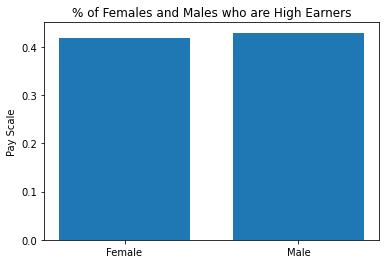

In [266]:
plt.bar(x_pos, height, width= [0.75, 0.75])
plt.xticks(x_pos, bars)
plt.ylabel("Pay Scale")
plt.title("% of Females and Males who are High Earners")
plt.show()

In [267]:
age=df['Age']

In [272]:
age.dropna()
# age.count() = 2839

0       32.0
1       65.0
2       52.0
3       50.0
4       44.0
5       22.0
6       42.0
7       41.0
8       31.0
9       48.0
10      31.0
11      29.0
12      28.0
13      65.0
14      54.0
15      64.0
16      42.0
18      38.0
19      32.0
20      61.0
21      60.0
22      60.0
23      42.0
24      32.0
25      47.0
26      37.0
27      27.0
28      45.0
29      29.0
30      59.0
31      50.0
32      50.0
33      49.0
34      22.0
35      64.0
36      25.0
37      51.0
38      31.0
39      47.0
40      26.0
41      33.0
43      22.0
44      62.0
45      27.0
46      59.0
47      44.0
48      47.0
49      23.0
51      24.0
52      36.0
53      21.0
54      26.0
55      42.0
56      52.0
57      27.0
58      64.0
59      24.0
60      43.0
61      27.0
62      45.0
63      28.0
64      54.0
65      22.0
66      24.0
67      54.0
68      24.0
69      42.0
70      31.0
71      40.0
72      20.0
73      19.0
74      23.0
75      46.0
76      19.0
77      27.0
78      62.0
79      22.0

In [276]:
np.mean(age)
## This is the mean age after dropping the null values in the age column

39.797816132441

In [71]:
from numpy import percentile

In [72]:
age=df['Age']

In [73]:
age

0       32.0
1       65.0
2       52.0
3       50.0
4       44.0
        ... 
2995    32.0
2996     NaN
2997    60.0
2998    51.0
2999    45.0
Name: Age, Length: 3000, dtype: float64

In [74]:
# data_4_list=data_4.to_numpy()

In [75]:
age=df['Age']


In [76]:
ages=age[~pd.isnull(age)]

In [77]:
# 5 number summary showing age of employees

data_min, data_max = ages.min(), ages.max()
quartiles = percentile(ages, [25, 50, 75])
# print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 19
Q1: 27.000
Median: 38
Q3: 52
Max: 65


In [78]:
avg_education=np.mean(df.Education_Level)
##avg_education = 
3.2263333333333333

3.2263333333333333

In [79]:
higher_ed=df.where(df['Education_Level']>=3)
# = 2425
# = .80833333%

In [80]:
lower_ed=df.where(df['Education_Level']<3)
# = 575
# - 0.19575166667%

In [81]:
df.pivot_table(index='Education_Level', columns='Pay_Scale', aggfunc={'Pay_Scale':len}, fill_value=0)

Pay_Scale                                             
Pay_Scale            1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0
Education_Level                                                       
1                       8    4    8   42   46   50   39   55   23    9
2                      10   11   11   46   50   47   33   52   23    7
3                      29   40   53  153  196  209  132  226   94   52
4                      16   40   29  132  140  172  115  192   77   28
5                      11   11   10   49   48   58   33   47   22    9

In [82]:
data_crosstab = pd.crosstab([df.Gender, df.Pay_Scale], 
                             df.Education_Level, margins = False)   

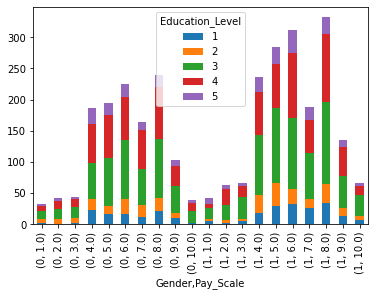

<Figure size 432x288 with 0 Axes>

In [83]:
data_crosstab.plot.bar(stacked=True)
plt.show()
plt.clf()
## too hard to read

In [84]:
height =[575, 2425]

In [85]:
bars=('Education Level < 3', 'Education Level >= 3')

In [86]:
x_pos=[4,5]

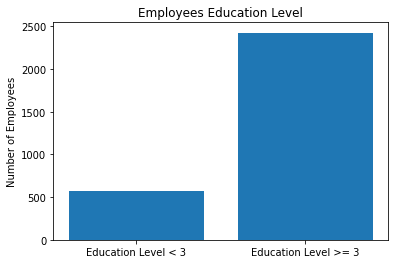

In [87]:
plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.ylabel("Number of Employees")
plt.title("Employees Education Level")
plt.show()

In [88]:
educated=df.where(df['Education_Level']>=3)

In [89]:
less_educated=df.where(df['Education_Level']<3)

In [90]:
#educated.count()
# 2425 

In [91]:
#less_educated.count()
# 575

In [92]:
educated_female=educated.where(educated['Gender']==1)

In [93]:
educated_female.count()
# =1388

Employee_ID                  1388
Gender                       1388
Age                          1320
Education_Level              1388
Relationship_Status          1388
Hometown                     1388
Unit                         1388
Decision_skill_possess       1388
Time_of_service              1370
Time_since_promotion         1388
growth_rate                  1388
Travel_Rate                  1388
Post_Level                   1388
Pay_Scale                    1386
Compensation_and_Benefits    1388
Work_Life_balance            1386
VAR1                         1388
VAR2                         1289
VAR3                         1388
VAR4                         1247
VAR5                         1388
VAR6                         1388
VAR7                         1388
dtype: int64

In [94]:
educated_male=educated.where(educated['Gender']==0)

In [95]:
educated_male.count()
# =1037

Employee_ID                  1037
Gender                       1037
Age                           981
Education_Level              1037
Relationship_Status          1037
Hometown                     1037
Unit                         1037
Decision_skill_possess       1037
Time_of_service              1017
Time_since_promotion         1037
growth_rate                  1037
Travel_Rate                  1037
Post_Level                   1037
Pay_Scale                    1037
Compensation_and_Benefits    1037
Work_Life_balance            1036
VAR1                         1037
VAR2                          964
VAR3                         1037
VAR4                          937
VAR5                         1037
VAR6                         1037
VAR7                         1037
dtype: int64

In [96]:
print(np.mean(educated_female))

Gender                   1.000000
Age                     39.625000
Education_Level          3.621758
Relationship_Status      0.631124
Time_of_service         13.200000
Time_since_promotion     2.417147
growth_rate             47.250000
Travel_Rate              0.805476
Post_Level               2.768012
Pay_Scale                6.045455
Work_Life_balance        2.401154
VAR1                     3.028818
VAR2                     0.065958
VAR3                    -0.024526
VAR4                     1.917402
VAR5                     2.823487
VAR6                     7.121758
VAR7                     3.242795
dtype: float64


In [97]:
print(np.mean(educated_male))

Gender                   0.000000
Age                     39.422018
Education_Level          3.650916
Relationship_Status      0.662488
Time_of_service         13.187807
Time_since_promotion     2.387657
growth_rate             46.505304
Travel_Rate              0.848602
Post_Level               2.778206
Pay_Scale                6.106075
Work_Life_balance        2.386100
VAR1                     3.125362
VAR2                    -0.036389
VAR3                     0.044597
VAR4                     1.880470
VAR5                     2.840887
VAR6                     7.132112
VAR7                     3.220829
dtype: float64


In [98]:
female_ed_pct=1388/1728

In [99]:
print(female_ed_pct)

0.8032407407407407


In [100]:
male_ed_pct=1037/1272

In [101]:
print(male_ed_pct)

0.815251572327044


In [102]:
male_ed_count=1341

In [103]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [104]:
heights =[0.815251572327044, 
0.8032407407407407]

In [105]:
bars=('Male', 'Female')

In [106]:
x_pos=[4,5]

In [107]:
#below shows the percentage of female and male highly educated employees

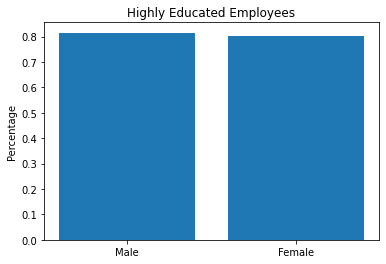

In [108]:
plt.bar(x_pos, heights)
plt.xticks(x_pos, bars)
plt.title("Highly Educated Employees")
plt.ylabel("Percentage")
plt.show()

In [109]:
analytical_skill=df[df['Decision_skill_possess']=="Analytical"]

In [110]:
analytical_skill.count()

Employee_ID                  746
Gender                       746
Age                          702
Education_Level              746
Relationship_Status          746
Hometown                     746
Unit                         746
Decision_skill_possess       746
Time_of_service              731
Time_since_promotion         746
growth_rate                  746
Travel_Rate                  746
Post_Level                   746
Pay_Scale                    746
Compensation_and_Benefits    746
Work_Life_balance            745
VAR1                         746
VAR2                         687
VAR3                         746
VAR4                         669
VAR5                         746
VAR6                         746
VAR7                         746
dtype: int64

In [111]:
behavioral_skill=df[df['Decision_skill_possess']=="Behavioral"]

In [112]:
behavioral_skill.count()

Employee_ID                  799
Gender                       799
Age                          761
Education_Level              799
Relationship_Status          799
Hometown                     799
Unit                         799
Decision_skill_possess       799
Time_of_service              783
Time_since_promotion         799
growth_rate                  799
Travel_Rate                  799
Post_Level                   799
Pay_Scale                    799
Compensation_and_Benefits    799
Work_Life_balance            798
VAR1                         799
VAR2                         742
VAR3                         799
VAR4                         721
VAR5                         799
VAR6                         799
VAR7                         799
dtype: int64

In [113]:
conceptual_skill=df[df['Decision_skill_possess']=="Conceptual"]

In [114]:
conceptual_skill.count()

Employee_ID                  720
Gender                       720
Age                          682
Education_Level              720
Relationship_Status          720
Hometown                     720
Unit                         720
Decision_skill_possess       720
Time_of_service              711
Time_since_promotion         720
growth_rate                  720
Travel_Rate                  720
Post_Level                   720
Pay_Scale                    719
Compensation_and_Benefits    720
Work_Life_balance            717
VAR1                         720
VAR2                         671
VAR3                         720
VAR4                         644
VAR5                         720
VAR6                         720
VAR7                         720
dtype: int64

In [115]:
directive_skill=df[df['Decision_skill_possess']=="Directive"]

In [116]:
directive_skill.count()

Employee_ID                  735
Gender                       735
Age                          694
Education_Level              735
Relationship_Status          735
Hometown                     735
Unit                         735
Decision_skill_possess       735
Time_of_service              723
Time_since_promotion         735
growth_rate                  735
Travel_Rate                  735
Post_Level                   735
Pay_Scale                    733
Compensation_and_Benefits    735
Work_Life_balance            735
VAR1                         735
VAR2                         683
VAR3                         735
VAR4                         668
VAR5                         735
VAR6                         735
VAR7                         735
dtype: int64

In [117]:
analytical_skill_high_pay=analytical_skill[analytical_skill['Pay_Scale']>=7]

In [118]:
analytical_skill_high_pay.count()

Employee_ID                  320
Gender                       320
Age                          306
Education_Level              320
Relationship_Status          320
Hometown                     320
Unit                         320
Decision_skill_possess       320
Time_of_service              313
Time_since_promotion         320
growth_rate                  320
Travel_Rate                  320
Post_Level                   320
Pay_Scale                    320
Compensation_and_Benefits    320
Work_Life_balance            319
VAR1                         320
VAR2                         294
VAR3                         320
VAR4                         282
VAR5                         320
VAR6                         320
VAR7                         320
dtype: int64

In [119]:
behavioral_skill_high_pay=behavioral_skill[behavioral_skill['Pay_Scale']>=7]

In [120]:
behavioral_skill_high_pay.count()

Employee_ID                  348
Gender                       348
Age                          330
Education_Level              348
Relationship_Status          348
Hometown                     348
Unit                         348
Decision_skill_possess       348
Time_of_service              340
Time_since_promotion         348
growth_rate                  348
Travel_Rate                  348
Post_Level                   348
Pay_Scale                    348
Compensation_and_Benefits    348
Work_Life_balance            347
VAR1                         348
VAR2                         323
VAR3                         348
VAR4                         320
VAR5                         348
VAR6                         348
VAR7                         348
dtype: int64

In [121]:
conceptual_skill_high_pay=conceptual_skill[conceptual_skill['Pay_Scale']>=7]

In [122]:
conceptual_skill_high_pay.count()

Employee_ID                  294
Gender                       294
Age                          277
Education_Level              294
Relationship_Status          294
Hometown                     294
Unit                         294
Decision_skill_possess       294
Time_of_service              291
Time_since_promotion         294
growth_rate                  294
Travel_Rate                  294
Post_Level                   294
Pay_Scale                    294
Compensation_and_Benefits    294
Work_Life_balance            292
VAR1                         294
VAR2                         270
VAR3                         294
VAR4                         260
VAR5                         294
VAR6                         294
VAR7                         294
dtype: int64

In [123]:
directive_skill_high_pay=directive_skill[directive_skill['Pay_Scale']>=7]

In [124]:
directive_skill_high_pay.count()

Employee_ID                  306
Gender                       306
Age                          288
Education_Level              306
Relationship_Status          306
Hometown                     306
Unit                         306
Decision_skill_possess       306
Time_of_service              301
Time_since_promotion         306
growth_rate                  306
Travel_Rate                  306
Post_Level                   306
Pay_Scale                    306
Compensation_and_Benefits    306
Work_Life_balance            306
VAR1                         306
VAR2                         284
VAR3                         306
VAR4                         274
VAR5                         306
VAR6                         306
VAR7                         306
dtype: int64

In [125]:
skills=[294,306,320,348]

In [126]:
pos=[2,4,6,8]

In [127]:
bars=('Conceptual', 'Directive', 'Analytical', 'Behavioral')

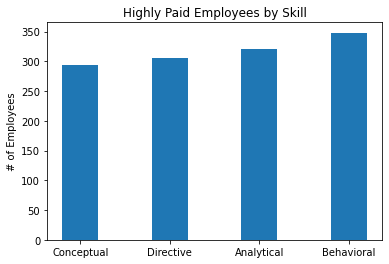

In [128]:
plt.bar(pos, skills)
plt.xticks(pos, bars)
plt.ylabel("# of Employees")
plt.title("Highly Paid Employees by Skill")
plt.show()
#Behavioral is the only one that stands out

In [129]:
male_high_pay

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
2,EID_22203,0,52.0,3,1,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
8,EID_13232,0,31.0,1,0,Springfield,IT,Analytical,7.0,3,...,8.0,type2,3.0,3,1.6081,0.7075,2.0,2,7,4
11,EID_14669,0,29.0,4,0,Washington,IT,Directive,7.0,2,...,9.0,type2,4.0,4,0.7516,-0.4537,1.0,3,5,4
14,EID_20157,0,54.0,3,0,Washington,IT,Analytical,18.0,4,...,7.0,type2,5.0,2,0.7516,-0.4537,2.0,2,7,4
18,EID_12838,0,38.0,3,1,Washington,Logistics,Directive,12.0,1,...,8.0,type3,1.0,3,-1.8176,-0.4537,NaN,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,EID_1668,0,56.0,5,1,Washington,R&D,Conceptual,19.0,1,...,7.0,type2,1.0,3,NaN,-1.6150,NaN,2,7,3
2975,EID_16121,0,23.0,3,1,Franklin,Quality,Conceptual,4.0,1,...,10.0,type3,1.0,4,-1.8176,-0.4537,NaN,1,8,3
2976,EID_14662,0,33.0,5,0,Franklin,Operarions,Behavioral,4.0,3,...,9.0,type3,5.0,3,-0.9612,-0.4537,1.0,2,7,5
2985,EID_4693,0,48.0,3,1,Springfield,Marketing,Analytical,17.0,2,...,8.0,type3,3.0,5,1.6081,-0.4537,1.0,2,7,3


In [130]:
df.Unit.unique()

array(['R&D', 'IT', 'Sales', 'Marketing', 'Purchasing', 'Operarions',
       'Human Resource Management', 'Logistics', 'Accounting and Finance',
       'Security', 'Quality', 'Production'], dtype=object)

In [131]:
RandD_high_pay=high_pay[high_pay['Unit']=='R&D']
# RandD_high_pay.count()  =113

In [132]:
IT_high_pay=high_pay[high_pay['Unit']=='IT']
# IT_high_pay.count() =195

In [133]:
sales_high_pay=high_pay[high_pay['Unit']=='Sales']
# sales_high_pay.count()  =201

In [134]:
marketing_high_pay=high_pay[high_pay['Unit']=='Marketing']
# marketing_high_pay.count()  =46

In [135]:
Purchasing_high_pay=high_pay[high_pay['Unit']=='Purchasing']
# Purchasing_high_pay.count()  =64

In [136]:
Operations_high_pay=high_pay[high_pay['Unit']=='Operarions']
# Operations_high_pay.count()  =105    fix spelling of Operations

In [137]:
Logistics_high_pay=high_pay[high_pay['Unit']=='Logistics']
# Logistics_high_pay.count()  =142

In [138]:
HR_high_pay=high_pay[high_pay['Unit']=='Human Resource Management']
# HR_high_pay.count()  =45

In [139]:
accounting_and_finance_high_pay=high_pay[high_pay['Unit']=='Accounting and Finance']
# accounting_and_finance_high_pay.count()   =63

In [140]:
security_high_pay=high_pay[high_pay['Unit']=='Security']
# security_high_pay.count()  =16

In [141]:
production_high_pay=high_pay[high_pay['Unit']=='Production']
# production_high_pay.count()   =27

In [142]:
quality_high_pay=high_pay[high_pay['Unit']=='Quality']
# quality_high_pay.count()  =30

In [143]:
high_pay_by_unit=[16,27,30,45,46,63,64,105,113, 142,195, 201]

In [144]:
pos=[2,4,6,8,10,12,14,16,18,20,22,24]

In [145]:
bars=('Security', 'Production', 'Quality', 'HR', 'Marketing', 'Acct & Finance', 'Purchasing', 'Operations', 'R & D', 'Logistics', 'IT', 'Sales')

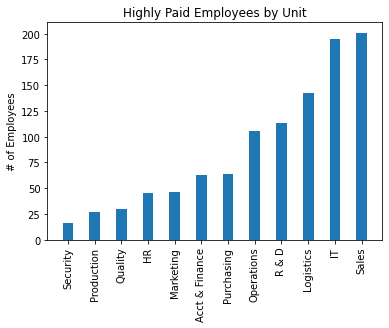

In [146]:
plt.clf()
plt.bar(pos, high_pay_by_unit)
plt.xticks(pos, bars, rotation=90, fontsize=10)
plt.ylabel("# of Employees")
plt.title("Highly Paid Employees by Unit")
plt.savefig("pay_by_unit.jpg")
plt.show()

In [147]:
wlb_1=df[df['Work_Life_balance']==1]
# 909

In [148]:
wlb_2=df[df['Work_Life_balance']==2]
# 672

In [149]:
wlb_3=df[df['Work_Life_balance']==3]
# 6835

In [150]:
wlb_4=df[df['Work_Life_balance']==4]
# 522

In [151]:
wlb_5=df[df['Work_Life_balance']==5]
# 57

In [152]:
df.Work_Life_balance.value_counts()
# Total count is 2995, which is correct, 5 = null

1.0    909
3.0    835
2.0    672
4.0    522
5.0     57
Name: Work_Life_balance, dtype: int64

In [153]:
#high_pay.count()
# 1268

In [154]:
high_pay_wlb_1=high_pay[high_pay['Work_Life_balance']==1]
# 421   

In [155]:
high_pay_wlb_1_pct=421/1268
# percentage of wlb_1 that are highly paid employees = 0.33201892744479494

In [156]:
high_pay_wlb_2=high_pay[high_pay['Work_Life_balance']==2]
# 282    

In [157]:
high_pay_wlb_2_pct=282/1268
# percentage of wlb_2 that are highly paid employees = 0.222397476340694

In [158]:
high_pay_wlb_3=high_pay[high_pay['Work_Life_balance']==3]
# 333   

In [159]:
high_pay_wlb_3_pct = 333/1268
# percentage of wlb_3 that are highly paid employees = 0.26261829652996843

In [160]:
high_pay_wlb_4=high_pay[high_pay['Work_Life_balance']==4]
# 205    

In [161]:
high_pay_wlb_4_pct=205/1268
# percentage of wlb_4 that are highly paid employees = 0.16167192429022081

In [162]:
high_pay_wlb_5=high_pay[high_pay['Work_Life_balance']==5]
# 23   

In [163]:
high_pay_wlb_5_pct=23/1268
#  percentage of wlb_5 that are highly paid employees = 0.018138801261829655

In [164]:
high_pay_wlb_5_pct

0.018138801261829655

In [165]:
all_high_paid_wlb=(421, 282, 333, 205, 23)

In [166]:
pct_high_paid_ees_by_wlb=[0.33201892744479494, 0.222397476340694, 0.26261829652996843, 0.16167192429022081, 0.018138801261829655]

In [167]:
pos=[2,4,6,8,10]

In [168]:
bars=('Work Life Bal = 1', 'Work Life Bal = 2', 'Work Life Bal = 3', 'Work Life Bal = 4', 'Work Life Bal =5 ') 

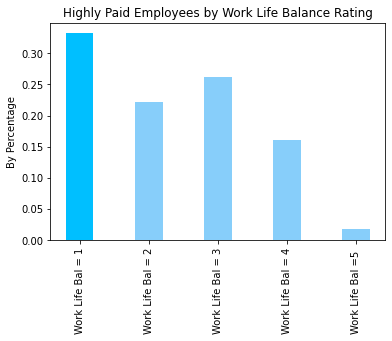

In [169]:
plt.clf()
plt.bar(pos, pct_high_paid_ees_by_wlb, color=['deepskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue'])
plt.xticks(pos, bars, rotation=90, fontsize=10)
plt.ylabel("By Percentage")
plt.title("Highly Paid Employees by Work Life Balance Rating")
plt.savefig("high_paid_by_wlb.jpg")
plt.show()

In [170]:
high_pay.pivot_table(index='Work_Life_balance', columns='Pay_Scale', aggfunc={'Pay_Scale':len}, fill_value=0)

Pay_Scale               
Pay_Scale              7.0  8.0  9.0  10.0
Work_Life_balance                         
1.0                     127  187   74   33
2.0                      66  147   42   27
3.0                      92  140   78   23
4.0                      60   87   38   20
5.0                       7   11    4    1

In [171]:
high_pay.to_csv('high_pay.csv')

In [172]:
high_pay_educated_3=high_pay[high_pay['Education_Level']==3]
# 504   

In [173]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [174]:
##Below let's look at education level 3 by age and create a box plot

In [175]:
data_3=high_pay_educated_3['Age']

In [176]:
np.mean(data_3)

40.5678496868476

In [177]:
data_3_list=data_3.to_numpy()

In [178]:
data_3_list = data_3_list[~pd.isnull(data_3_list)]
#remove null values

In [179]:
print(np.mean(data_3_list))
# 40.5678496868476
# This is the average age of highly paid employees with education level 3

40.5678496868476


In [180]:
high_pay_educated_4=high_pay[high_pay['Education_Level']==4]
# 412

In [181]:
data_4=high_pay_educated_4['Age']

In [182]:
data_4_list=data_4.to_numpy()

In [183]:
data_4_list = data_4_list[~pd.isnull(data_4_list)]

In [184]:
print(np.mean(data_4_list))
# 39.3359173126615 
# This is the average age of highly paid employees with education level 4

39.3359173126615


In [185]:
high_pay_educated_5=high_pay[high_pay['Education_Level']==5]
# 111

In [186]:
data_5=high_pay_educated_5['Age']

In [187]:
data_5_list=data_5.to_numpy()

In [188]:
data_5_list = data_5_list[~pd.isnull(data_5_list)]

In [189]:
print(np.mean(data_5_list))
# 41.083333333333336
# This is the average age of highly paid employees with education level 5

41.083333333333336


<Figure size 432x288 with 0 Axes>

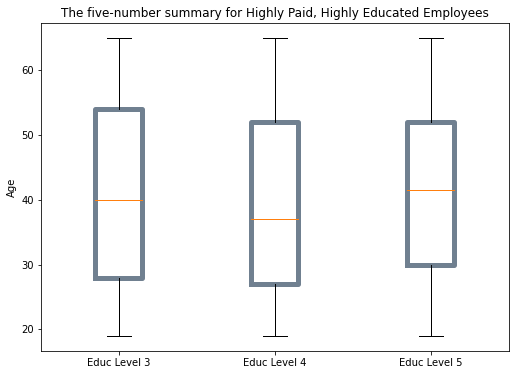

In [190]:
  
plt.clf()

data = [data_3_list, data_4_list, data_5_list]
  
fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 0.65, 0.65])
  
# Creating plot
bp = ax.boxplot(data)
#plt.boxplot(data, notch=None, vert=None, patch_artist=None, widths=None)
plt.title("The five-number summary for Highly Paid, Highly Educated Employees")
plt.ylabel("Age")
plt.xticks([1, 2, 3], ['Educ Level 3', 'Educ Level 4', 'Educ Level 5'])

for box in bp['boxes']:
    box.set(color='slategray', linewidth=5)

plt.show()

In [191]:
#5 number summary showing ages of highly paid, educated employees
### Highly Paid, Education Level 3

data_min, data_max = data_3_list.min(), data_3_list.max()
quartiles = percentile(data_3_list, [25, 50, 75])
# print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 19
Q1: 28.000
Median: 40
Q3: 54
Max: 65


In [192]:
#5 number summary showing ages of highly paid, educated employees
### Highly Paid, Education Level 4

data_min, data_max = data_4_list.min(), data_4_list.max()
quartiles = percentile(data_4_list, [25, 50, 75])
# print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 19
Q1: 27.000
Median: 37
Q3: 52
Max: 65


In [193]:
#5 number summary showing ages of highly paid, educated employees
### Highly Paid, Education Level 5

data_min, data_max = data_5_list.min(), data_5_list.max()
quartiles = percentile(data_5_list, [25, 50, 75])
# print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 19
Q1: 30.000
Median: 42
Q3: 52
Max: 65


In [194]:
data_3_4_5_list=list(itertools.chain(data_3_list, data_4_list, data_5_list))

In [195]:
stats.describe(data_3_list)

DescribeResult(nobs=479, minmax=(19.0, 65.0), mean=40.5678496868476, variance=188.35888051292355, skewness=0.10220277184229817, kurtosis=-1.3284419125278346)

In [196]:
quartiles = percentile(data_3_list, [25, 50, 75])

In [197]:
quartiles

array([28., 40., 54.])

In [198]:
age=df['Age']

In [199]:
# 5 number summary showing age of employees

data_min, data_max = age.min(), age.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 19.000
Q1: 28.000
Median: 40.000
Q3: 54.000
Max: 65.000


In [200]:
stats.describe(data_4_list)

DescribeResult(nobs=387, minmax=(19.0, 65.0), mean=39.3359173126615, variance=187.7107014231969, skewness=0.24089949963326548, kurtosis=-1.2774685483919945)

In [201]:
stats.describe(data_5_list)

DescribeResult(nobs=108, minmax=(19.0, 65.0), mean=41.083333333333336, variance=181.2172897196262, skewness=0.1079284823688218, kurtosis=-1.1730766254299174)

In [202]:
stats.describe(data_3_4_5_list)

DescribeResult(nobs=974, minmax=(19.0, 65.0), mean=40.13552361396304, variance=187.37524242852712, skewness=0.15678013489932646, kurtosis=-1.2986668485275505)

In [203]:
high_pay.pivot_table(index='Education_Level', columns='Pay_Scale', aggfunc={'Pay_Scale':len}, fill_value=0)

Pay_Scale               
Pay_Scale            7.0  8.0  9.0  10.0
Education_Level                         
1                      39   55   23    9
2                      33   52   23    7
3                     132  226   94   52
4                     115  192   77   28
5                      33   47   22    9

In [204]:
# high_pay.count() =1268

In [205]:
# pct_high_pay_ed_3=504/1268  = 0.39747634069400634

In [206]:
# pct_high_pay_ed_4= 412/1268   = 0.3249211356466877

In [207]:
# pct_high_pay_ed_5 = 111/1268  = 0.08753943217665615

In [208]:
pct_high_pay_high_ed=[0.39747634069400634,0.3249211356466877, 0.08753943217665615]

In [209]:
pos=[2,4,6]

In [210]:
bars=('Educ Level 3', 'Educ Level 4', 'Educ Level 5') 

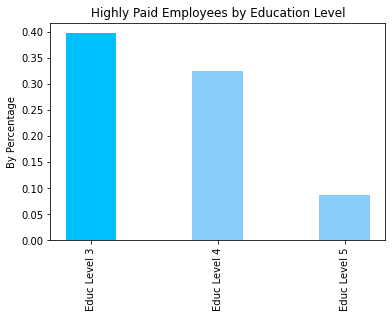

In [211]:
plt.clf()
plt.bar(pos, pct_high_pay_high_ed, color=['deepskyblue', 'lightskyblue', 'lightskyblue'])
plt.xticks(pos, bars, rotation=90, fontsize=10)
plt.ylabel("By Percentage")
plt.title("Highly Paid Employees by Education Level")
plt.savefig("high_paid_by_Ed.jpg")
plt.show()

In [212]:
df.Relationship_Status.value_counts()
# single =0, married =1

1    1941
0    1059
Name: Relationship_Status, dtype: int64

In [213]:
# Below let's find the relationship between relationship status and wlb

In [214]:
data_crosstab = pd.crosstab(df['Relationship_Status'],
                            df['Work_Life_balance'], 
                               margins = False)

In [215]:
data_crosstab

Work_Life_balance,1.0,2.0,3.0,4.0,5.0
Relationship_Status,,,,,
0,332,226,294,183,24
1,577,446,541,339,33


In [216]:
#######Need to account for % of employees who are single vs married to accuratlely view relationship

In [217]:
#data_crosstab = pd.crosstab([data.grade, data.purpose], 
#                             data.loan_status, margins = False)

In [218]:
data_crosstab = pd.crosstab([df.Relationship_Status, df.Work_Life_balance], 
                             df.Pay_Scale, margins = False)

In [219]:
data_crosstab

Pay_Scale                              1.0   2.0   3.0   4.0   5.0   6.0   \
Relationship_Status Work_Life_balance                                       
0                   1.0                   7    14    12    41    49    53   
                    2.0                   8     8     8    32    40    36   
                    3.0                   5    10     9    38    45    60   
                    4.0                   6     6     9    24    30    38   
                    5.0                   1     1     2     2     4     5   
1                   1.0                  13    17    20    78    87    96   
                    2.0                  10    12    11    63    76    85   
                    3.0                  17    18    24    90    82   103   
                    4.0                   7    19    16    50    58    54   
                    5.0                   0     1     0     4     8     6   

Pay_Scale                              7.0   8.0   9.0   10.0  
Relationship_Status Work_Life_balance                          
0                   1.0                  53    59    34     9  
                    2.0                  23    51    15     5  
                    3.0                  36    53    28    10  
                    4.0                  16    31    15     8  
                    5.0                   3     5     1     0  
1                   1.0                  74   128    40    24  
                    2.0                  43    96    27    22  
                    3.0                  56    87    50    13  
                    4.0                  44    56    23    12  
                    5.0                   4     6     3     1

In [220]:
data_crosstab = pd.crosstab([df.Relationship_Status, df.Pay_Scale], 
                             df.Work_Life_balance, margins = False)   

In [221]:
data_crosstab

Work_Life_balance              1.0  2.0  3.0  4.0  5.0
Relationship_Status Pay_Scale                         
0                   1.0          7    8    5    6    1
                    2.0         14    8   10    6    1
                    3.0         12    8    9    9    2
                    4.0         41   32   38   24    2
                    5.0         49   40   45   30    4
                    6.0         53   36   60   38    5
                    7.0         53   23   36   16    3
                    8.0         59   51   53   31    5
                    9.0         34   15   28   15    1
                    10.0         9    5   10    8    0
1                   1.0         13   10   17    7    0
                    2.0         17   12   18   19    1
                    3.0         20   11   24   16    0
                    4.0         78   63   90   50    4
                    5.0         87   76   82   58    8
                    6.0         96   85  103   54    6
                    7.0         74   43   56   44    4
                    8.0        128   96   87   56    6
                    9.0         40   27   50   23    3
                    10.0        24   22   13   12    1

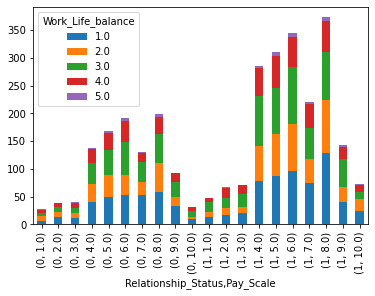

In [222]:
data_crosstab.plot.bar(stacked=True)
plt.show()

In [223]:
# The below histogram doesn't make much sense, work on this

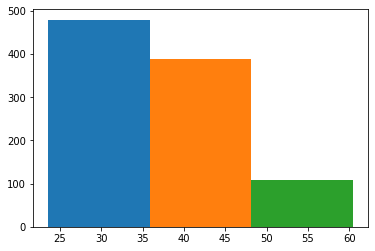

In [224]:
x = [data_3_list, data_4_list, data_5_list]
plt.hist(x, bins = 1)
plt.show()